In [1]:
import bids
from nilearn.interfaces.fmriprep import load_confounds
from nilearn.maskers import NiftiLabelsMasker
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.io import loadmat 
from nilearn.connectome import ConnectivityMeasure
import nibabel as nib
from nilearn import plotting
import os

In [2]:
# load dataset
pwd = 'C:\\Users\\user\\Desktop'

data_path = os.path.join(pwd, 'open_close_001', 'derivatives')
layout = bids.BIDSLayout(data_path, validate=False, config=['bids','derivatives'])

layout

BIDS Layout: ...top\open_close_001\derivatives | Subjects: 1 | Sessions: 0 | Runs: 2

In [3]:
# load atlas
atlas_path = os.path.join(pwd, 'HCPex_atlas.nii')
atlas_filename = nib.load(atlas_path)

In [4]:
# paths for functional files of 1st subject

sub = '001'
func_files = layout.get(subject=sub,
                        datatype='func', task='rest',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                        return_type='file')

print(func_files)

close_img = func_files[0]
open_img = func_files[1]

['C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-001\\func\\sub-001_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-001\\func\\sub-001_task-rest_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']


In [5]:
# confounds 

confound_files = layout.get(subject=sub,
                            datatype='func', task='rest',
                            desc='confounds',
                            extension="tsv",
                            return_type='file')

confound_files

['C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-001\\func\\sub-001_task-rest_run-1_desc-confounds_timeseries.tsv',
 'C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-001\\func\\sub-001_task-rest_run-2_desc-confounds_timeseries.tsv']

In [6]:
close_outliers = pd.read_csv(confound_files[0], sep='\t')
open_outliers = pd.read_csv(confound_files[1], sep='\t')

In [7]:
print(pd.read_csv(confound_files[0], sep='\t').columns.values)

['global_signal' 'global_signal_derivative1' 'global_signal_power2'
 'global_signal_derivative1_power2' 'csf' 'csf_derivative1'
 'csf_derivative1_power2' 'csf_power2' 'white_matter'
 'white_matter_derivative1' 'white_matter_power2'
 'white_matter_derivative1_power2' 'csf_wm' 'tcompcor' 'std_dvars' 'dvars'
 'framewise_displacement' 'rmsd' 't_comp_cor_00' 't_comp_cor_01'
 't_comp_cor_02' 't_comp_cor_03' 't_comp_cor_04' 'c_comp_cor_00'
 'c_comp_cor_01' 'c_comp_cor_02' 'c_comp_cor_03' 'c_comp_cor_04'
 'c_comp_cor_05' 'c_comp_cor_06' 'c_comp_cor_07' 'c_comp_cor_08'
 'c_comp_cor_09' 'c_comp_cor_10' 'w_comp_cor_00' 'w_comp_cor_01'
 'w_comp_cor_02' 'w_comp_cor_03' 'w_comp_cor_04' 'w_comp_cor_05'
 'w_comp_cor_06' 'w_comp_cor_07' 'w_comp_cor_08' 'w_comp_cor_09'
 'w_comp_cor_10' 'w_comp_cor_11' 'w_comp_cor_12' 'w_comp_cor_13'
 'w_comp_cor_14' 'w_comp_cor_15' 'w_comp_cor_16' 'w_comp_cor_17'
 'w_comp_cor_18' 'w_comp_cor_19' 'w_comp_cor_20' 'w_comp_cor_21'
 'w_comp_cor_22' 'w_comp_cor_23' 'w_comp_co

### Load confounds

Confounds used in Conn

* white matter timeseries (5 CompCor noise components), 
* CSF timeseries (5 CompCor noise components), 
* motion parameters and their first order derivatives (12 factors), 
* session and task effects and their first order derivatives (4 factors), 
* linear trends (2 factors) within each functional run,
* bandpass frequency filtering between 0.008 Hz and 0.09 Hz.

 CompCor[18,19] noise components within white matter and CSF were estimated by computing the average BOLD signal as well as the largest principal components orthogonal to the BOLD average, motion parameters, and outlier scans within each subject's eroded segmentation masks.

If your analysis includes separate high-pass filtering, do not include cosine_XX regressors in your design matrix.

fMRIPrep does high-pass filtering before running anatomical or temporal CompCor. Therefore, when using CompCor regressors, the corresponding cosine_XX regressors should also be included in the design matrix.

In [95]:
close_conf, close_sample_mask = load_confounds(
    close_img,
    strategy=["motion", 'compcor', 'high_pass'],
    motion="full",
    compcor='anat_combined', 
    n_compcor=10
    )

print("The shape of the confounds matrix is:", close_conf.shape)
print(close_conf.columns)

The shape of the confounds matrix is: (120, 37)
Index(['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
       'a_comp_cor_04', 'a_comp_cor_05', 'a_comp_cor_06', 'a_comp_cor_07',
       'a_comp_cor_08', 'a_comp_cor_09', 'cosine00', 'cosine01', 'cosine02',
       'rot_x', 'rot_x_derivative1', 'rot_x_derivative1_power2',
       'rot_x_power2', 'rot_y', 'rot_y_derivative1',
       'rot_y_derivative1_power2', 'rot_y_power2', 'rot_z',
       'rot_z_derivative1', 'rot_z_derivative1_power2', 'rot_z_power2',
       'trans_x', 'trans_x_derivative1', 'trans_x_derivative1_power2',
       'trans_x_power2', 'trans_y', 'trans_y_derivative1',
       'trans_y_derivative1_power2', 'trans_y_power2', 'trans_z',
       'trans_z_derivative1', 'trans_z_derivative1_power2', 'trans_z_power2'],
      dtype='object')


In [96]:
open_conf, open_sample_mask = load_confounds(
    open_img,
    strategy=["motion", 'compcor', 'high_pass'],
    motion="full",
    compcor='anat_combined', 
    n_compcor=10
    )

print("The shape of the confounds matrix is:", open_conf.shape)
print(open_conf.columns)

The shape of the confounds matrix is: (120, 37)
Index(['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
       'a_comp_cor_04', 'a_comp_cor_05', 'a_comp_cor_06', 'a_comp_cor_07',
       'a_comp_cor_08', 'a_comp_cor_09', 'cosine00', 'cosine01', 'cosine02',
       'rot_x', 'rot_x_derivative1', 'rot_x_derivative1_power2',
       'rot_x_power2', 'rot_y', 'rot_y_derivative1',
       'rot_y_derivative1_power2', 'rot_y_power2', 'rot_z',
       'rot_z_derivative1', 'rot_z_derivative1_power2', 'rot_z_power2',
       'trans_x', 'trans_x_derivative1', 'trans_x_derivative1_power2',
       'trans_x_power2', 'trans_y', 'trans_y_derivative1',
       'trans_y_derivative1_power2', 'trans_y_power2', 'trans_z',
       'trans_z_derivative1', 'trans_z_derivative1_power2', 'trans_z_power2'],
      dtype='object')


In [10]:
out = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
       'a_comp_cor_04', 'global_signal',
       'global_signal_derivative1', 'rot_x', 'rot_x_derivative1', 'rot_y',
       'rot_y_derivative1', 'rot_z', 'rot_z_derivative1', 'trans_x',
       'trans_x_derivative1', 'trans_y', 'trans_y_derivative1', 'trans_z',
       'trans_z_derivative1']

#close_conf = close_outliers.loc[:, out].fillna(method='backfill')
#open_conf = open_outliers.loc[:, out].fillna(method='backfill')


In [13]:
close_conf.drop(['cosine00', 'cosine01', 'cosine02'], axis=1, inplace=True)
open_conf.drop(['cosine00', 'cosine01', 'cosine02'], axis=1, inplace=True)

In [14]:
print(close_conf.columns)

Index(['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
       'a_comp_cor_04', 'a_comp_cor_05', 'a_comp_cor_06', 'a_comp_cor_07',
       'a_comp_cor_08', 'a_comp_cor_09', 'rot_x', 'rot_x_derivative1',
       'rot_x_derivative1_power2', 'rot_x_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2',
       'rot_z_power2', 'trans_x', 'trans_x_derivative1',
       'trans_x_derivative1_power2', 'trans_x_power2', 'trans_y',
       'trans_y_derivative1', 'trans_y_derivative1_power2', 'trans_y_power2',
       'trans_z', 'trans_z_derivative1', 'trans_z_derivative1_power2',
       'trans_z_power2'],
      dtype='object')


UserWarning: After resampling the label image to the data image, the following labels were removed: {401.0, 365.0, 398.0}. Label image only contains 424 labels (including background).

In [97]:
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    #high_pass=0.008,
    #low_pass=0.09, 
    #t_r=2.5,
    memory="nilearn_cache",
    verbose=5,
    standardize='zscore_sample', # 
    detrend=True)

close_ts = masker.fit_transform(close_img, confounds=close_conf)
open_ts = masker.fit_transform(open_img, confounds=open_conf)

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image('C:\Users\user\Desktop\HCPex_atlas.nii')
Resampling labels


c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\nilearn\maskers\nifti_labels_masker.py:545: UserWarning: After resampling the label image to the data image, the following labels were removed: {401.0, 365.0, 398.0}. Label image only contains 424 labels (including background).
  warnings.warn("After resampling the label image to the "


________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-001\\func\\sub-001_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': True,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x000001EA7C453130>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=[      a_comp_cor_00  a_comp_cor_01  a_comp_cor_02  a_comp_cor_03  \
0         0.101723       0.229325      -0.059259       0.029732   
1        -0.026666       0.183151      -0.135998       0.025896 

c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-001\\func\\sub-001_task-rest_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': True,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x000001EA7C453130>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=[      a_comp_cor_00  a_comp_cor_01  a_comp_cor_02  a_comp_cor_03  \
0        -0.059171       0.104315       0.025983      -0.023170   
1        -0.084171       0.128766      -0.0829

c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


In [98]:
roi = pd.read_csv('C:\\Users\\user\\Desktop\\HCPex_LookUpTable.txt', sep='\t', index_col='#No.')
roi.drop([401, 365, 398], axis=0, inplace=True)

In [99]:
correlation_measure = ConnectivityMeasure(kind="correlation")
correlation_matrix = correlation_measure.fit_transform([close_ts, open_ts])
np.fill_diagonal(correlation_matrix[0], 0)
np.fill_diagonal(correlation_matrix[1], 0)

c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\nilearn\connectome\connectivity_matrices.py:495: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\nilearn\connectome\connectivity_matrices.py:495: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = 

### Load Conn outputs

In [18]:
ts_conn = loadmat('C:\\Users\\user\\Desktop\\ROI_Subject001_Condition000.mat')

ts_close_conn = np.zeros((426, 120))
ts_open_conn = np.zeros((426, 120))

for i in range(3, 429):
    ts_close_conn[i-3] = ts_conn['data'][0][i].reshape((240))[:120]
    ts_open_conn[i-3]  = ts_conn['data'][0][i].reshape((240))[120:]


to_del = [401, 365, 398]
ts_close_conn = np.delete(ts_close_conn, to_del, axis=0)
ts_open_conn =  np.delete(ts_open_conn, to_del, axis=0)

In [19]:
close_z = loadmat(
    'C:\\Users\\user\\Desktop\\conn_data\\conn_sub-001\\results\\firstlevel\\SBC_01\\resultsROI_Condition001.mat')['Z']
open_z = loadmat(
    'C:\\Users\\user\\Desktop\\conn_data\\conn_sub-001\\results\\firstlevel\\SBC_01\\resultsROI_Condition002.mat')['Z']

np.fill_diagonal(close_z, 0)
np.fill_diagonal(open_z, 0)

In [20]:
def del_rois(matr, rois=to_del):
    matr = np.delete(matr, rois, axis=0)
    matr = np.delete(matr, rois, axis=1)
    return matr

close_z = del_rois(close_z)
open_z  = del_rois(open_z)

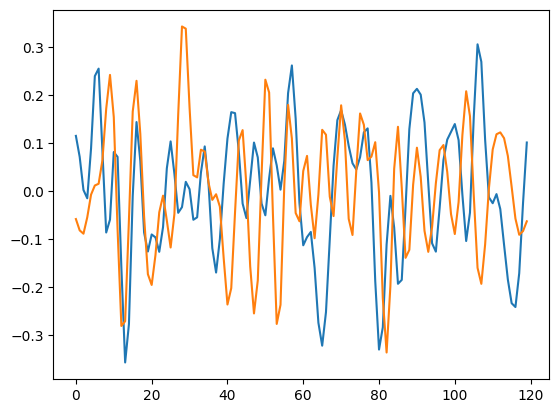

In [21]:
plt.plot(ts_close_conn[0])
plt.plot(ts_open_conn[0]);

### Matrix reorder

In [116]:
sorted_roi = pd.read_excel('C:\\Users\\user\\PycharmProjects\\Open_Close_GNN\\data\\HCPex_sorted_v2_networks_names.xlsx',
                           index_col='Index')
sorted_roi.index = list(range(1, 427))
sorted_roi.head()

,Unnamed: 0,ID,Label,Cortical Division,R,G,B,X,Y,Z,network,network_label
1,0,1,Primary_Visual_Cortex_L,Primary_Visual,208,216,117,-10.078,-84.159,1.759,1,Visual1
2,1,181,Primary_Visual_Cortex_R,Primary_Visual,208,216,117,12.231,-80.644,4.101,1,Visual1
3,2,2,Second_Visual_Area_L,Early_Visual,231,50,224,-12.044,-82.059,4.029,2,Visual2
4,3,182,Second_Visual_Area_R,Early_Visual,231,50,224,12.367,-78.138,5.714,2,Visual2
5,4,3,Third_Visual_Area_L,Early_Visual,33,58,133,-16.607,-84.793,7.259,2,Visual2


In [117]:
to_del = [401, 365, 398]
sorted_roi = sorted_roi[sorted_roi.ID != to_del[0]]
sorted_roi = sorted_roi[sorted_roi.ID != to_del[1]]
sorted_roi = sorted_roi[sorted_roi.ID != to_del[2]]

In [119]:
sorted_roi.sort_values('ID', inplace=True)

In [118]:
sorted_roi.reset_index(inplace=True)

In [ ]:
oto = np.zeros((426, 426))
for i in range(423):
    for t in range(423):
        

In [120]:
sorted_roi

,index,Unnamed: 0,ID,Label,Cortical Division,R,G,B,X,Y,Z,network,network_label
0,1,0,1,Primary_Visual_Cortex_L,Primary_Visual,208,216,117,-10.078,-84.159,1.759,1,Visual1
2,3,2,2,Second_Visual_Area_L,Early_Visual,231,50,224,-12.044,-82.059,4.029,2,Visual2
4,5,4,3,Third_Visual_Area_L,Early_Visual,33,58,133,-16.607,-84.793,7.259,2,Visual2
6,7,6,4,Fourth_Visual_Area_L,Early_Visual,233,44,241,-29.556,-86.009,-1.542,2,Visual2
8,9,8,5,IntraParietal_Sulcus_Area_1_L,Dorsal_Stream_Visual,162,59,163,-24.456,-74.776,38.047,2,Visual2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,418,417,422,Substantia_nigra_pars_reticulata_R,Subcortical,150,68,124,10.038,-15.978,-13.499,0,Subcortical
416,420,419,423,Ventral_tegmenta_area_R,Subcortical,53,40,216,3.738,-20.690,-16.786,0,Subcortical
418,422,421,424,Mammillary_bodies_R,Subcortical,77,72,54,2.396,-7.792,-14.783,0,Subcortical
420,424,423,425,Septal_nucleus_R,Subcortical,121,113,141,1.183,6.383,-3.046,0,Subcortical


In [129]:
correlation_matrix[0][sorted_roi.ID]

IndexError: index 423 is out of bounds for axis 0 with size 423

In [124]:
cc.T[sorted_roi.index]

array([[ 0.        ,  0.38168022, -0.06167883, ..., -0.05837585,
        -0.07028919, -0.06142312],
       [ 0.38168022,  0.        , -0.05567339, ..., -0.02361136,
        -0.04847954, -0.04093403],
       [-0.06167883, -0.05567339,  0.        , ...,  0.16238327,
         0.07898843,  0.01407591],
       ...,
       [-0.05837585, -0.02361136,  0.16238327, ...,  0.        ,
        -0.01999402, -0.00272226],
       [-0.07028919, -0.04847954,  0.07898843, ..., -0.01999402,
         0.        , -0.03102971],
       [-0.06142312, -0.04093403,  0.01407591, ..., -0.00272226,
        -0.03102971,  0.        ]], dtype=float32)

In [43]:
d.keys()

dict_keys([1, 181, 2, 182, 3, 183, 4, 184, 5, 185, 6, 186, 7, 187, 8, 188, 9, 189, 10, 190, 11, 191, 12, 192, 13, 193, 14, 194, 15, 195, 16, 196, 17, 197, 18, 198, 19, 199, 20, 200, 21, 201, 22, 202, 23, 203, 24, 204, 25, 205, 26, 206, 27, 207, 28, 208, 29, 209, 30, 210, 31, 211, 32, 212, 33, 213, 34, 214, 35, 215, 36, 216, 37, 217, 38, 218, 39, 219, 40, 220, 41, 221, 42, 222, 43, 223, 44, 224, 45, 225, 46, 226, 47, 227, 48, 228, 49, 229, 50, 230, 51, 231, 52, 232, 53, 233, 54, 234, 55, 235, 56, 236, 57, 237, 58, 238, 59, 239, 60, 240, 61, 241, 62, 242, 63, 243, 64, 244, 65, 245, 66, 246, 67, 247, 68, 248, 69, 249, 70, 250, 71, 251, 72, 252, 73, 253, 74, 254, 75, 255, 76, 256, 77, 257, 78, 258, 79, 259, 80, 260, 81, 261, 82, 262, 83, 263, 84, 264, 85, 265, 86, 266, 87, 267, 88, 268, 89, 269, 90, 270, 91, 271, 92, 272, 93, 273, 94, 274, 95, 275, 96, 276, 97, 277, 98, 278, 99, 279, 100, 280, 101, 281, 102, 282, 103, 283, 104, 284, 105, 285, 106, 286, 107, 287, 108, 288, 109, 289, 110, 29

In [91]:
sort_ = np.zeros((423, 423))
for i, en in zip(sorted_roi.index, sorted_roi['Unnamed: 0']):
    if en < 423:
        sort_[en] = correlation_matrix[0][i]
    else: 
        sort_[en-3] = correlation_matrix[0][i]

In [92]:
sort = np.zeros((423, 423))
for i, en in zip(sorted_roi.index, sorted_roi['Unnamed: 0']):
    if en < 423:
        sort[en] = sort_.T[i]
    else: 
        sort[en-3] = sort_.T[i]

In [84]:
sorted_roi

,index,Unnamed: 0,ID,Label,Cortical Division,R,G,B,X,Y,Z,network,network_label
0,1,0,1,Primary_Visual_Cortex_L,Primary_Visual,208,216,117,-10.078,-84.159,1.759,1,Visual1
1,3,2,2,Second_Visual_Area_L,Early_Visual,231,50,224,-12.044,-82.059,4.029,2,Visual2
2,5,4,3,Third_Visual_Area_L,Early_Visual,33,58,133,-16.607,-84.793,7.259,2,Visual2
3,7,6,4,Fourth_Visual_Area_L,Early_Visual,233,44,241,-29.556,-86.009,-1.542,2,Visual2
4,9,8,5,IntraParietal_Sulcus_Area_1_L,Dorsal_Stream_Visual,162,59,163,-24.456,-74.776,38.047,2,Visual2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,417,422,Substantia_nigra_pars_reticulata_R,Subcortical,150,68,124,10.038,-15.978,-13.499,0,Subcortical
419,420,419,423,Ventral_tegmenta_area_R,Subcortical,53,40,216,3.738,-20.690,-16.786,0,Subcortical
420,422,421,424,Mammillary_bodies_R,Subcortical,77,72,54,2.396,-7.792,-14.783,0,Subcortical
421,424,423,425,Septal_nucleus_R,Subcortical,121,113,141,1.183,6.383,-3.046,0,Subcortical


In [74]:
sorted_roi.reset_index(inplace=True)

In [81]:
sorted_roi.loc[2]

Unnamed: 0                                 1
ID                                       181
Label                Primary_Visual_Cortex_R
Cortical Division             Primary_Visual
R                                        208
G                                        216
B                                        117
X                                     12.231
Y                                    -80.644
Z                                      4.101
network                                    1
network_label                        Visual1
Name: 2, dtype: object

In [60]:
d = {}
for k, v in zip(sorted_roi.index, correlation_matrix[0]):
    d[k] = v

In [61]:
dd = dict(sorted(d.items()))

In [63]:
srt = np.array(list(dd.values()))

In [ ]:
for 

In [ ]:
srt

In [65]:
op = np.zeros((423, 423))
for i in range(423):
    op[i] = srt.T[i]

In [128]:
cc.shape

(423,)

In [127]:
from seaborn import heatmap
heatmap(cc, cmap='icefire')

IndexError: Inconsistent shape between the condition and the input (got (423, 1) and (423,))

In [ ]:
for i in d.keys()

In [30]:
dd.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [ ]:
    sortd = np.zeros((423, 423))
    for i, en in zip(roi_df.ID, roi_df.index):
        if i not in to_del:
            sortd[en] = matr[i-1]
    for en, i in list(zip(roi_df['Unnamed: 0'], roi_df.ID)):
        if i not in to_del:
            sortd[en] = sortd.T[i-1]

In [48]:

def reorder_matrix(matr, roi_df):
    d = {k: v for k, v in zip(roi_df.ID, matr)}
    #d = dict(sorted(d.items()))
    sortd = np.array(list(d.values()))
    op = np.zeros((423, 423))
    for i in range(423):
        op[i] = sortd.T[i]
    return op


In [44]:
reorder_matrix(correlation_matrix[0], sorted_roi)

array([[ 0.        ,  0.50785369, -0.3919329 , ...,  0.17884713,
        -0.13868515,  0.27206361],
       [ 0.72257537,  0.75666875, -0.36239481, ...,  0.02888706,
        -0.10577665, -0.02974636],
       [ 0.50785369,  0.        , -0.31708509, ..., -0.02852305,
        -0.00665453, -0.13171798],
       ...,
       [ 0.12310974,  0.08639693,  0.17168149, ...,  0.11699394,
        -0.12220409, -0.18837868],
       [ 0.27206361, -0.13171798, -0.24778184, ...,  0.34442836,
        -0.21529827,  0.        ],
       [-0.22228141, -0.26437634, -0.12447252, ..., -0.05694352,
        -0.16083546, -0.12490892]])

### Comparison

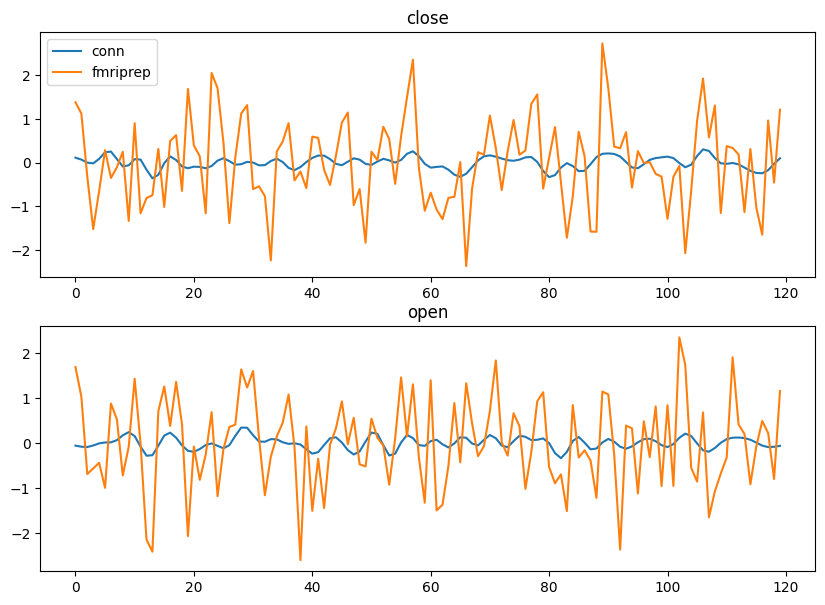

In [100]:
roi_num = 0
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
ax1.plot(ts_close_conn[roi_num], label='conn')
ax1.plot(close_ts[:, roi_num] , label='fmriprep')
ax1.set_title('close')
ax2.plot(ts_open_conn[roi_num])
ax2.plot(open_ts[:, roi_num])
ax2.set_title('open')
ax1.legend();

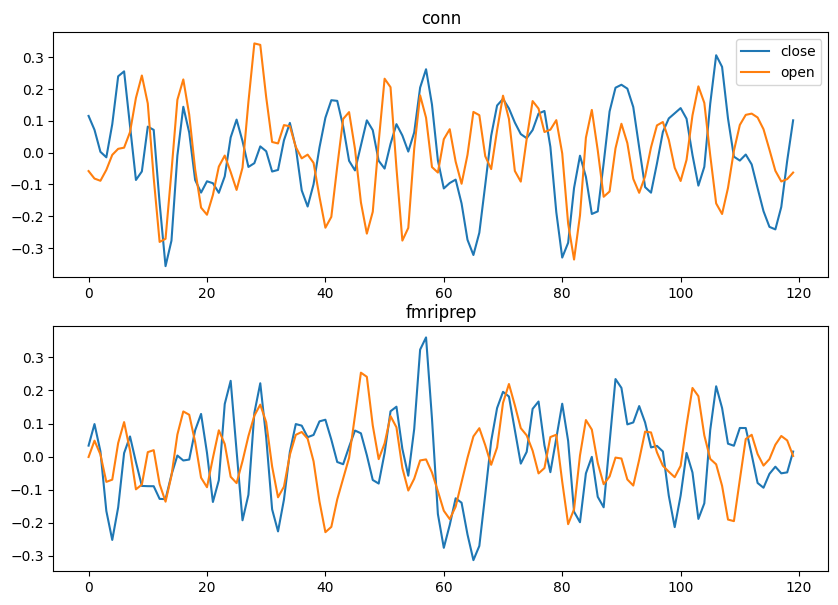

In [36]:
roi_num = 0
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
ax1.plot(ts_close_conn[roi_num], label='close')
ax1.plot(ts_open_conn[roi_num], label='open')
ax1.set_title('conn')
ax2.plot(close_ts[:, roi_num])
ax2.plot(open_ts[:, roi_num])
ax2.set_title('fmriprep')
ax1.legend();

In [101]:
def plot_corr(ts1, ts2, title=''):
    l=[]
    for i in range(423):
        l.append(np.corrcoef(ts1[i], ts2[i])[0, 1])
    plt.hist(l, bins='auto')
    plt.title(f'{title}, median={round(np.median(l), 3)}');


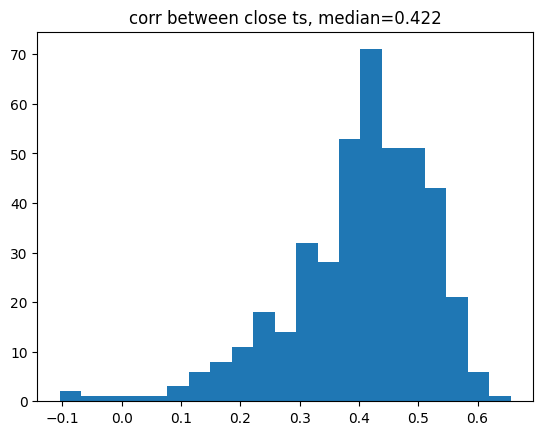

In [102]:
plot_corr(ts_close_conn, close_ts.T, 'corr between close ts')

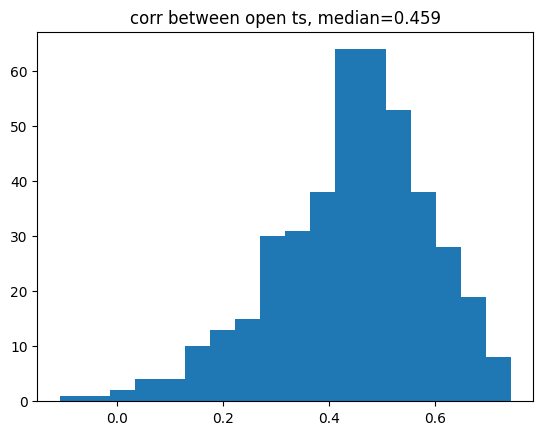

In [103]:
plot_corr(ts_open_conn, open_ts.T, f'corr between open ts')

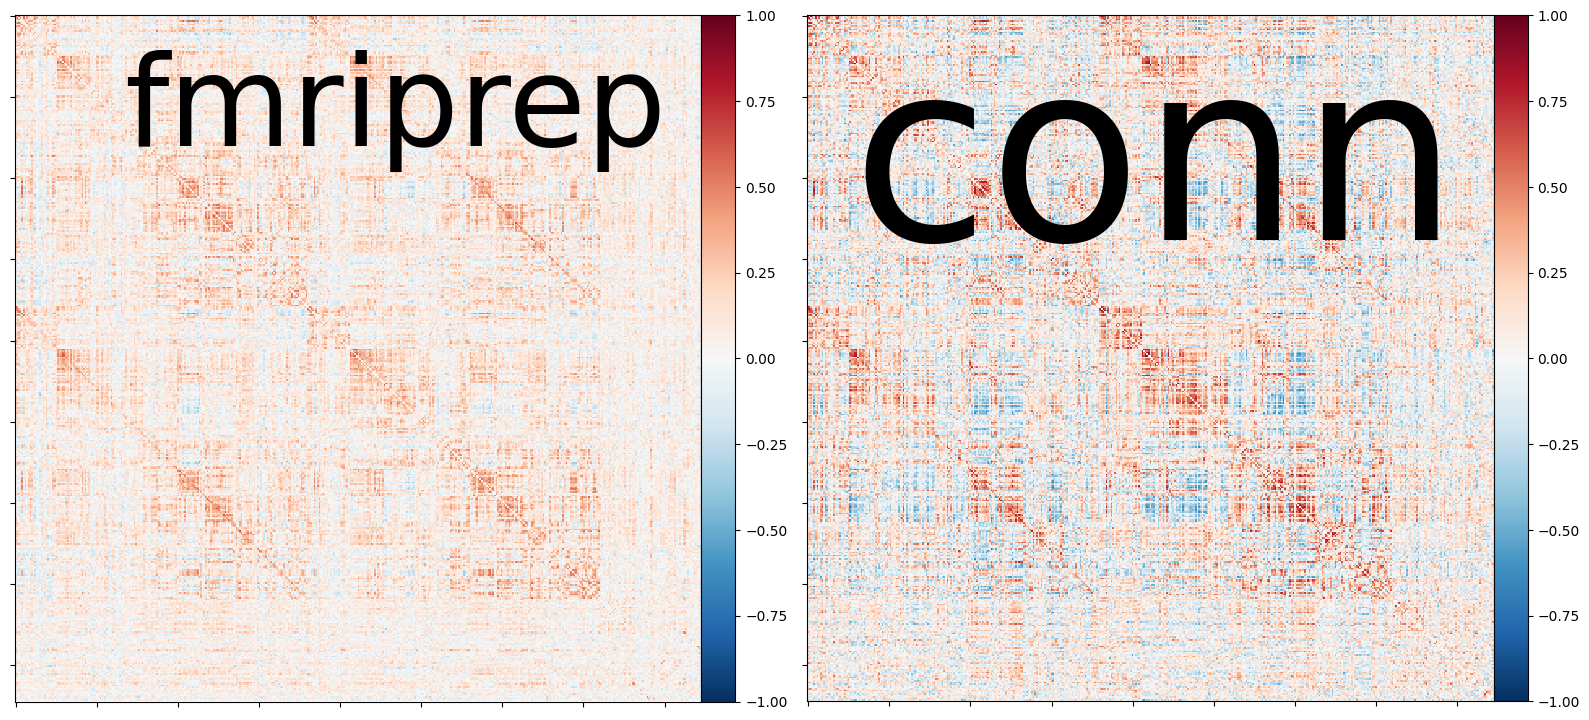

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.set_title = 'fmriprep'
ax2.set_title = 'conn'
plotting.plot_matrix(
    correlation_matrix[0],
    #figure=(10, 8),
    labels=None,
    vmax=1,
    vmin=-1,
    title="fmriprep",
    reorder=False, axes=ax1)

plotting.plot_matrix(
    np.tanh(close_z),
    #figure=(10, 8),
    labels=None,
    vmax=1,
    vmin=-1,
    title="conn", 
    reorder=False, axes=ax2);

In [108]:
np.corrcoef(np.tanh(close_z).flatten(), correlation_matrix[0].flatten())[0, 1]

0.5239731985355442